<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/04_Modelo_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
x = data.drop(['TimeInShelterDays'], axis = 1)
y = data['TimeInShelterDays']
x = np.array(x)
y = np.array(y)

In [ ]:
def MAPE(Y_est,Y):
    """Mean Absolute Percentage Error para los problemas de regresión
    Y_est: numpy array con los valores estimados
    Y: numpy array con las etiquetas verdaderas
    retorna: mape
    """
    N = np.size(Y)
    epsilon = 1e-10
    mape = np.sum(abs((Y_est.reshape(N, 1) - Y.reshape(N, 1)) / (Y.reshape(N, 1) + epsilon))) / N
    return mape

In [ ]:
#ejercicio de código
def experimentar_rf(X, Y, num_trees,numero_de_variables):
    """función que realiza experimentos con el modelo random forest
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo
    retorna: dataframe con:
        -  numero de arboles usados
        -  variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviación de estandar de la eficiencia de entrenamiento
        - eficiencia de prueba
        - desviación estandar de la eficiencia de prueba
    """
    folds = 5
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            mapeTrain = []
            mapeTest = []
            maeTrain = []
            maeTest = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                #Ajuste la semilla en 0 para garantizar la reproducibilidad de los resultados
                modelo = RandomForestRegressor(min_samples_leaf=5, n_estimators=trees, max_features=num_variables)
                modelo.fit(Xtrain, Ytrain)
                #predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain)
                #predecir muestras de pruebas
                Yest = modelo.predict(Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                mapeTrain.append(MAPE(Ytrain_pred,Ytrain))
                mapeTest.append(MAPE(Yest,Ytest))
                maeTrain.append(mean_absolute_error(Ytrain, Ytrain_pred))
                maeTest.append(mean_absolute_error(Ytest, Yest))
            resultados.loc[idx,'número de arboles'] = trees
            resultados.loc[idx,'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx,'MAPE de entrenamiento'] = np.mean(mapeTrain)
            resultados.loc[idx,'MAPE de prueba'] = np.mean(mapeTest)
            resultados.loc[idx,'MAE de entrenamiento'] = np.mean(maeTrain)
            resultados.loc[idx,'MAE de prueba'] = np.mean(maeTest)
            idx= idx +1
        print(f"termina para {trees} arboles")

    return (resultados)

In [ ]:
arboles = [3,5,10,20,50,75,100, 125, 150, 175, 200]
variables_seleccion = [1,2,3,5,10]
resultados_rf = experimentar_rf(X=x, Y=y, num_trees = arboles ,numero_de_variables = variables_seleccion)
resultados_rf

termina para 3 arboles
termina para 5 arboles
termina para 10 arboles
termina para 20 arboles
termina para 50 arboles
termina para 75 arboles
termina para 100 arboles
termina para 125 arboles
termina para 150 arboles
termina para 175 arboles
termina para 200 arboles


,número de arboles,variables para la selección del mejor umbral,MAPE de entrenamiento,MAPE de prueba,MAE de entrenamiento,MAE de prueba
0,3.0,1.0,1.829660,2.064466,20.457981,22.920143
1,3.0,2.0,1.798324,2.095209,20.130000,22.946588
2,3.0,3.0,1.758907,2.118615,19.796700,23.568059
3,3.0,5.0,1.704883,2.062066,19.108452,23.457015
4,3.0,10.0,1.577393,2.032256,18.072399,23.658817
5,5.0,1.0,1.818212,2.030201,20.026486,22.784042
6,5.0,2.0,1.802398,2.060403,19.871880,22.912265
7,5.0,3.0,1.752571,2.045023,19.596733,22.839326
8,5.0,5.0,1.694730,2.091246,18.832543,22.837491
9,5.0,10.0,1.575779,2.123118,17.576985,23.428883


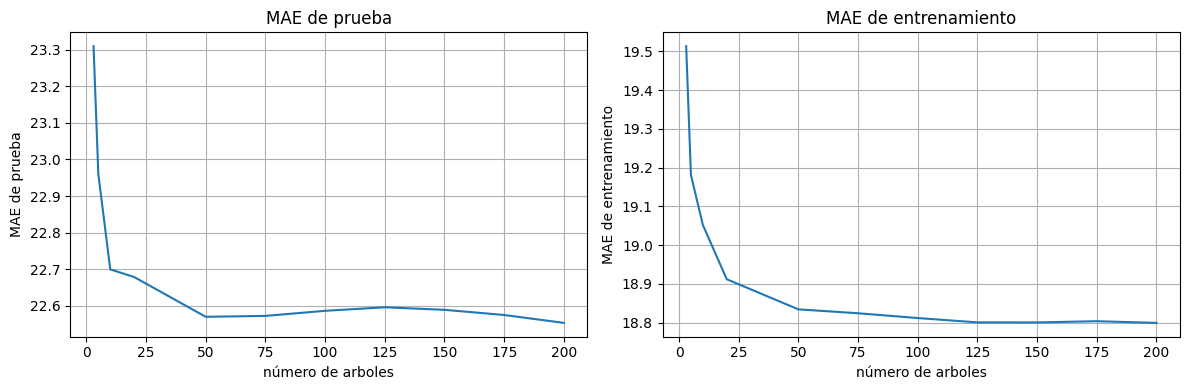

In [ ]:
# Agrupar datos
rf_mae_test = resultados_rf.groupby("número de arboles")['MAE de prueba'].mean().reset_index()
rf_mae_train = resultados_rf.groupby("número de arboles")['MAE de entrenamiento'].mean().reset_index()

# Crear figura con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Gráfico MAE de prueba
sns.lineplot(data=rf_mae_test, x='número de arboles', y='MAE de prueba', ax=axes[0])
axes[0].set_title('MAE de prueba')
axes[0].grid(True)

# Gráfico MAE de entrenamiento
sns.lineplot(data=rf_mae_train, x='número de arboles', y='MAE de entrenamiento', ax=axes[1])
axes[1].set_title('MAE de entrenamiento')
axes[1].grid(True)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()


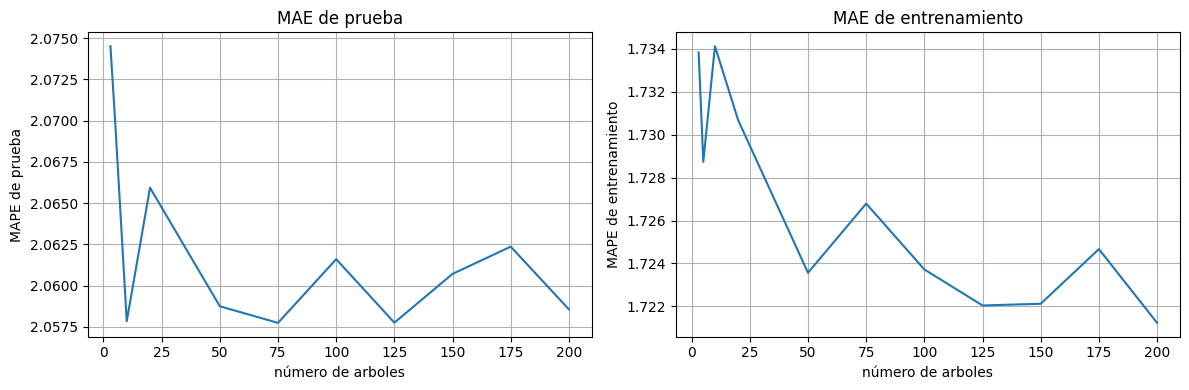

In [ ]:
# Agrupar datos
rf_mae_test = resultados_rf.groupby("número de arboles")['MAPE de prueba'].mean().reset_index()
rf_mae_train = resultados_rf.groupby("número de arboles")['MAPE de entrenamiento'].mean().reset_index()

# Crear figura con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 fila, 2 columnas

# Gráfico MAE de prueba
sns.lineplot(data=rf_mae_test, x='número de arboles', y='MAPE de prueba', ax=axes[0])
axes[0].set_title('MAE de prueba')
axes[0].grid(True)

# Gráfico MAE de entrenamiento
sns.lineplot(data=rf_mae_train, x='número de arboles', y='MAPE de entrenamiento', ax=axes[1])
axes[1].set_title('MAE de entrenamiento')
axes[1].grid(True)

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()
